In [277]:
import pandas as pd

In [278]:
df = pd.read_csv('/content/vehicle_maintenance_data_v2.csv')

EDA

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Vehicle_Model        1000 non-null   object 
 1   Mileage              1000 non-null   float64
 2   Maintenance_History  1000 non-null   object 
 3   Reported_Issues      1000 non-null   int64  
 4   Vehicle_Age          1000 non-null   int64  
 5   Fuel_Type            1000 non-null   object 
 6   Transmission_Type    1000 non-null   object 
 7   Odometer_Reading     1000 non-null   int64  
 8   Tire_Condition       1000 non-null   object 
 9   Brake_Condition      1000 non-null   object 
 10  Battery_Status       1000 non-null   object 
 11  Insurance_Premium    1000 non-null   float64
 12  Need_Maintenance     1000 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 101.7+ KB


In [280]:
df.shape

(1000, 13)

In [281]:
df.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Odometer_Reading,Tire_Condition,Brake_Condition,Battery_Status,Insurance_Premium,Need_Maintenance
0,Honda Civic,29.8,average,6,1,Petrol,Automatic,102442,new,bad,bad,2494.75,1
1,Nissan Altima,17.8,average,10,13,Electric,Manual,95181,new,bad,good,898.61,1
2,BMW 3 Series,34.8,average,1,4,Petrol,Manual,152582,good,bad,new,1177.66,1
3,Ford F-150,28.0,poor,1,3,Petrol,Manual,42958,good,new,new,1359.36,1
4,Toyota Corolla,20.5,good,9,9,Electric,Manual,98045,bad,new,bad,972.74,1


Process

In [282]:
# Check the distribution of the target variable
print(df['Need_Maintenance'].value_counts())

Need_Maintenance
1    509
0    491
Name: count, dtype: int64


In [283]:
df.isnull().sum()

,0
Vehicle_Model,0
Mileage,0
Maintenance_History,0
Reported_Issues,0
Vehicle_Age,0
Fuel_Type,0
Transmission_Type,0
Odometer_Reading,0
Tire_Condition,0
Brake_Condition,0


In [284]:
# Target and features
X = df.drop('Need_Maintenance', axis=1)
y = df['Need_Maintenance']

In [285]:
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import LabelEncoder

# Convert categorical features to numeric using LabelEncoder
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [286]:
for column, encoder in label_encoders.items():
  print(f"Mapping for {column}:")
  mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
  print(mapping)


Mapping for Vehicle_Model:
{'BMW 3 Series': 0, 'Chevrolet Malibu': 1, 'Ford F-150': 2, 'Honda Civic': 3, 'Hyundai Sonata': 4, 'Kia Optima': 5, 'Mazda CX-5': 6, 'Nissan Altima': 7, 'Toyota Corolla': 8, 'Volkswagen Jetta': 9}
Mapping for Maintenance_History:
{'average': 0, 'good': 1, 'poor': 2}
Mapping for Fuel_Type:
{'Diesel': 0, 'Electric': 1, 'Petrol': 2}
Mapping for Transmission_Type:
{'Automatic': 0, 'Manual': 1}
Mapping for Tire_Condition:
{'bad': 0, 'good': 1, 'new': 2}
Mapping for Brake_Condition:
{'bad': 0, 'good': 1, 'new': 2}
Mapping for Battery_Status:
{'bad': 0, 'good': 1, 'new': 2}


In [287]:
# Apply ANOVA for numerical features
X_numeric = X.select_dtypes(include=['int64', 'float64'])
f_values, p_values = f_classif(X_numeric, y)
anova_df = pd.DataFrame({'Feature': X_numeric.columns, 'F-Value': f_values, 'P-Value': p_values})
print(anova_df.sort_values(by='F-Value', ascending=False))


                Feature   F-Value   P-Value
3       Reported_Issues  2.071751  0.150363
7      Odometer_Reading  0.665702  0.414749
1               Mileage  0.605012  0.436856
5             Fuel_Type  0.536061  0.464242
9       Brake_Condition  0.409782  0.522227
2   Maintenance_History  0.246388  0.619740
0         Vehicle_Model  0.204167  0.651476
6     Transmission_Type  0.146385  0.702096
4           Vehicle_Age  0.118806  0.730405
10       Battery_Status  0.092581  0.760985
8        Tire_Condition  0.045595  0.830957
11    Insurance_Premium  0.015377  0.901338


In [288]:
# The ANOVA test (Analysis of Variance) helps determine if there is a statistically significant difference between the means of two or more groups.
# In this context, it's used to assess the relationship between numerical features and the target variable 'Need_Maintenance'.
# By calculating the F-value and p-value, we can identify which numerical features have the strongest influence on the target variable.
# Higher F-values indicate a stronger relationship between the feature and the target variable.
# Lower p-values suggest that the relationship is statistically significant.

# This information is valuable for feature selection.
# Features with high F-values and low p-values are likely to be more relevant for predicting 'Need_Maintenance'.
# This can help simplify the model and improve its performance by focusing on the most informative features.


In [289]:
# Apply Chi-Square for categorical features
X_categorical = X[[col for col in X]]  # Select columns based on label_encoders dictionary
chi2_values, p_values = chi2(X_categorical, y)
chi2_df = pd.DataFrame({'Feature': X_categorical.columns, 'Chi2-Value': chi2_values, 'P-Value': p_values})
print(chi2_df.sort_values(by='Chi2-Value', ascending=False))

                Feature    Chi2-Value   P-Value
7      Odometer_Reading  16961.526868  0.000000
3       Reported_Issues      4.024824  0.044835
11    Insurance_Premium      2.168189  0.140892
1               Mileage      1.370222  0.241774
0         Vehicle_Model      0.367783  0.544215
5             Fuel_Type      0.356591  0.550406
9       Brake_Condition      0.281663  0.595613
4           Vehicle_Age      0.278033  0.597994
2   Maintenance_History      0.159710  0.689424
6     Transmission_Type      0.073768  0.785927
10       Battery_Status      0.063319  0.801325
8        Tire_Condition      0.028987  0.864808


In [290]:
# The Chi-Square test is used to determine if there is a significant association between two categorical variables.
# In this context, it's used to assess the relationship between categorical features and the target variable 'Need_Maintenance'.
# It helps identify if there is a dependency between the categories of the feature and the categories of the target variable.
# Higher Chi2-values indicate a stronger association between the feature and the target variable.
# Lower p-values suggest that the association is statistically significant.

# This information is also valuable for feature selection.
# Features with high Chi2-values and low p-values are likely to be more relevant for predicting 'Need_Maintenance'.
# This can help simplify the model and improve its performance by focusing on the most informative features.

In [291]:
# Correlation Matrix
corr_matrix = X_numeric.corrwith(df['Need_Maintenance'])
print(corr_matrix.sort_values(ascending=False))


Reported_Issues        0.045515
Odometer_Reading       0.025818
Mileage                0.024614
Fuel_Type              0.023170
Maintenance_History    0.015711
Transmission_Type      0.012110
Battery_Status         0.009631
Insurance_Premium      0.003925
Tire_Condition        -0.006759
Vehicle_Age           -0.010910
Vehicle_Model         -0.014302
Brake_Condition       -0.020259
dtype: float64


In [292]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# models
models = {
    'SVC': SVC(kernel='linear', probability=True),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {model_name: {'features': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'roc_auc': []} for model_name in models}

# Evaluate models with different feature sets -> RFE
for model_name, model in models.items():
    for n_features_to_select in range(3, 11):  # Try different numbers of features from 3 to 10
        # Apply RFE
        rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
        X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
        X_test_rfe = rfe.transform(X_test_scaled)

        # Train the model
        model.fit(X_train_rfe, y_train)

        # Make predictions
        y_pred = model.predict(X_test_rfe)
        y_pred_proba = model.predict_proba(X_test_rfe)[:, 1]

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        # Store results
        results[model_name]['features'].append(n_features_to_select)
        results[model_name]['accuracy'].append(accuracy)
        results[model_name]['precision'].append(precision)
        results[model_name]['recall'].append(recall)
        results[model_name]['f1_score'].append(f1)
        results[model_name]['roc_auc'].append(roc_auc)

        print(f'{model_name} with {n_features_to_select} features:')
        print(f'  Accuracy: {accuracy:.4f}')
        print(f'  Precision: {precision:.4f}')
        print(f'  Recall: {recall:.4f}')
        print(f'  F1-Score: {f1:.4f}')
        print(f'  ROC AUC: {roc_auc:.4f}')
        print('-' * 30)


SVC with 3 features:
  Accuracy: 0.4500
  Precision: 0.4722
  Recall: 0.4904
  F1-Score: 0.4811
  ROC AUC: 0.4655
------------------------------
SVC with 4 features:
  Accuracy: 0.4600
  Precision: 0.4808
  Recall: 0.4808
  F1-Score: 0.4808
  ROC AUC: 0.4672
------------------------------
SVC with 5 features:
  Accuracy: 0.4800
  Precision: 0.5000
  Recall: 0.5865
  F1-Score: 0.5398
  ROC AUC: 0.4497
------------------------------
SVC with 6 features:
  Accuracy: 0.4850
  Precision: 0.5043
  Recall: 0.5673
  F1-Score: 0.5339
  ROC AUC: 0.5418
------------------------------
SVC with 7 features:
  Accuracy: 0.4700
  Precision: 0.4911
  Recall: 0.5288
  F1-Score: 0.5093
  ROC AUC: 0.4449
------------------------------
SVC with 8 features:
  Accuracy: 0.4550
  Precision: 0.4775
  Recall: 0.5096
  F1-Score: 0.4930
  ROC AUC: 0.5432
------------------------------
SVC with 9 features:
  Accuracy: 0.4500
  Precision: 0.4727
  Recall: 0.5000
  F1-Score: 0.4860
  ROC AUC: 0.5513
----------------

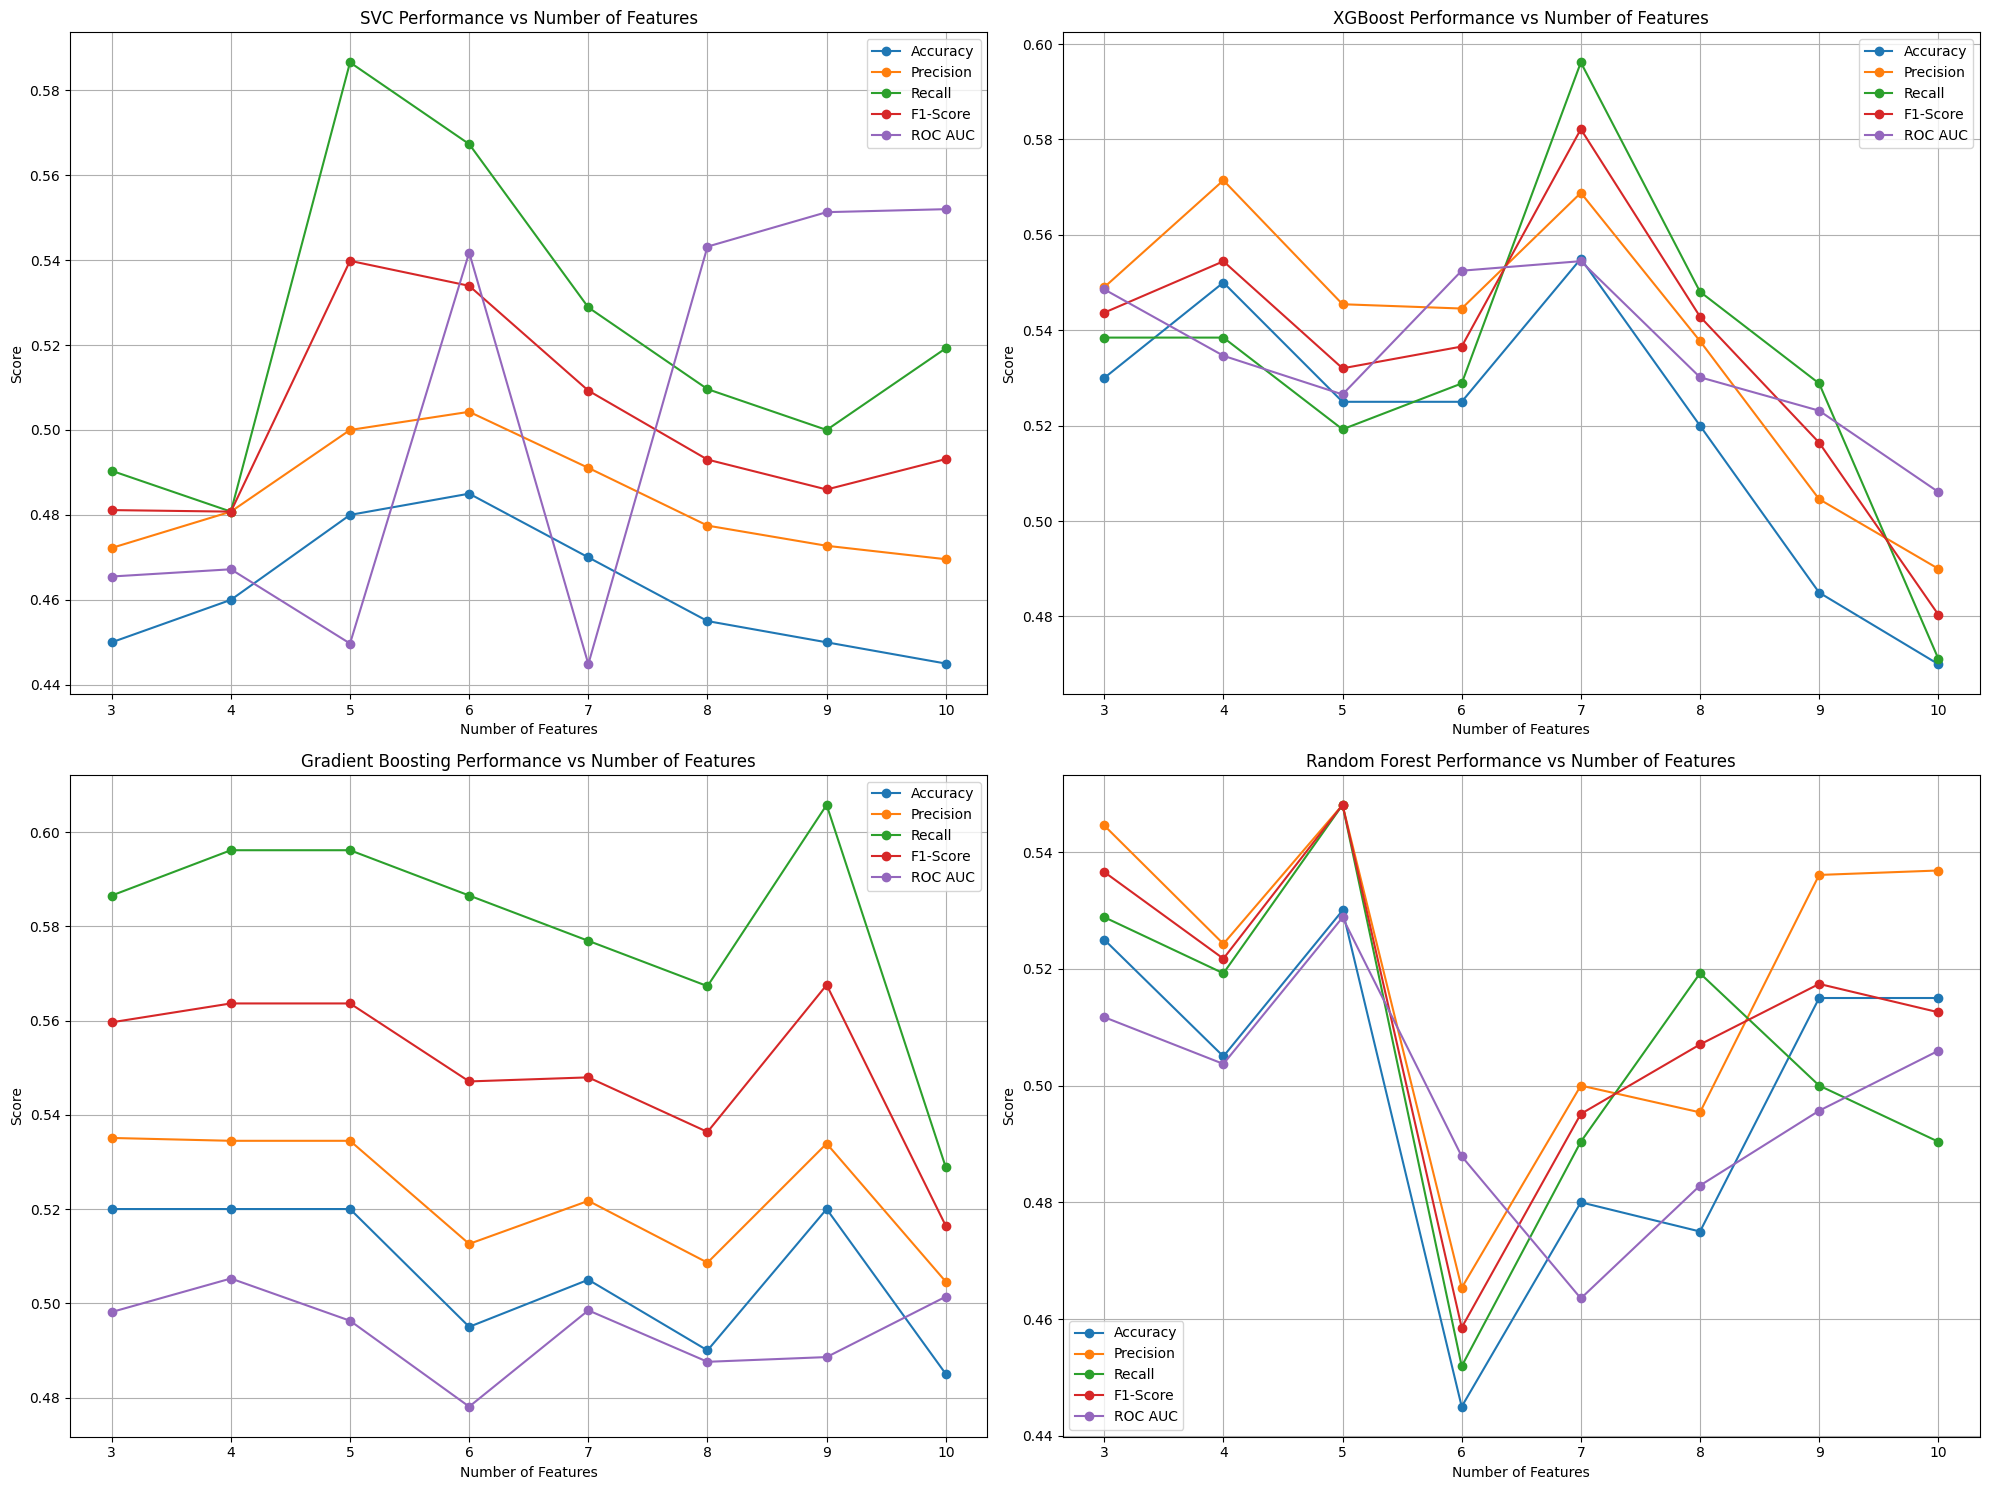

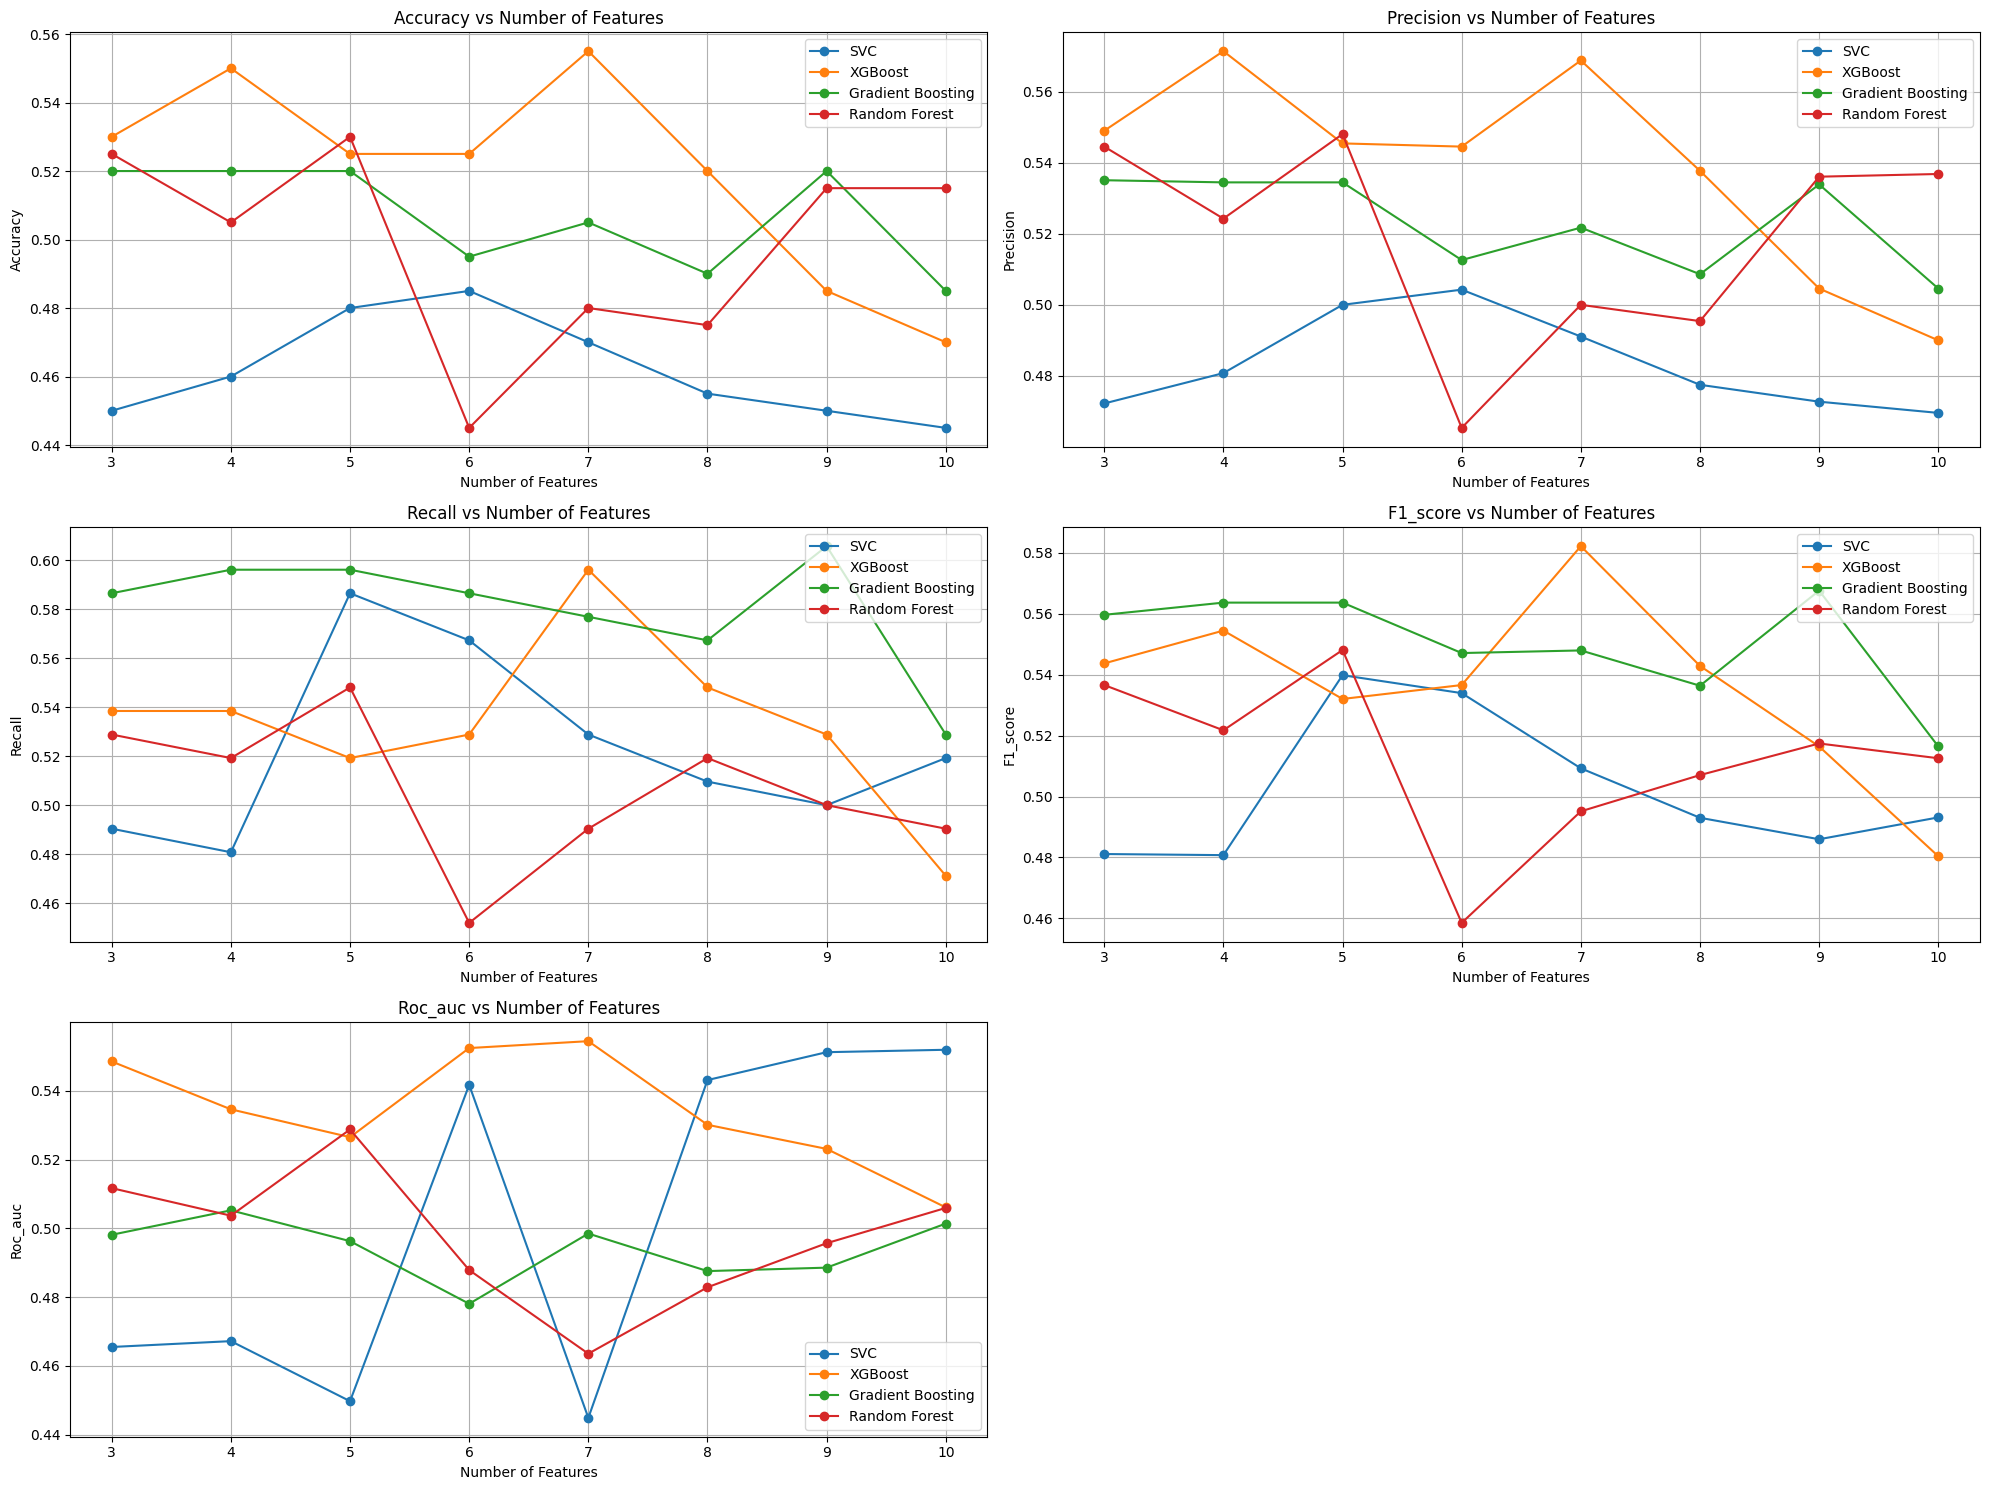

In [293]:
plt.figure(figsize=(20, 15))

# Plot for each model
for i, (model_name, metrics) in enumerate(results.items()):
    plt.subplot(2, 2, i+1)
    plt.plot(metrics['features'], metrics['accuracy'], marker='o', label='Accuracy')
    plt.plot(metrics['features'], metrics['precision'], marker='o', label='Precision')
    plt.plot(metrics['features'], metrics['recall'], marker='o', label='Recall')
    plt.plot(metrics['features'], metrics['f1_score'], marker='o', label='F1-Score')
    plt.plot(metrics['features'], metrics['roc_auc'], marker='o', label='ROC AUC')
    plt.title(f'{model_name} Performance vs Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plot for each evaluation metric across all models
metrics_names = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
plt.figure(figsize=(20, 15))

for i, metric in enumerate(metrics_names):
    plt.subplot(3, 2, i+1)
    for model_name, metrics in results.items():
        plt.plot(metrics['features'], metrics[metric], marker='o', label=model_name)
    plt.title(f'{metric.capitalize()} vs Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [294]:
best_model = max(results, key=lambda k: max(results[k]['accuracy']))
best_features = results[best_model]['features'][results[best_model]['accuracy'].index(max(results[best_model]['accuracy']))]
best_accuracy = max(results[best_model]['accuracy'])

print(f"The best model is {best_model} with {best_features} features and an accuracy of {best_accuracy:.4f}")


The best model is XGBoost with 7 features and an accuracy of 0.5550


In [295]:
best_model = max(results, key=lambda k: max(results[k]['accuracy']))
best_features_count = results[best_model]['features'][results[best_model]['accuracy'].index(max(results[best_model]['accuracy']))]

rfe = RFE(estimator=models[best_model], n_features_to_select=best_features_count)
rfe.fit(X_train_scaled, y_train)

selected_feature_indices = [i for i in range(len(rfe.support_)) if rfe.support_[i]]

selected_features = X.columns[selected_feature_indices]

print(f"The 7 best features for the {best_model} model are: {selected_features}")


The 7 best features for the XGBoost model are: Index(['Mileage', 'Maintenance_History', 'Vehicle_Age', 'Fuel_Type',
       'Odometer_Reading', 'Tire_Condition', 'Battery_Status'],
      dtype='object')


In [296]:
# Select the specified features
features = ['Mileage', 'Maintenance_History', 'Vehicle_Age', 'Fuel_Type',
       'Odometer_Reading', 'Tire_Condition', 'Battery_Status']
X_selected = X[features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the XGBoost model
model = XGBClassifier()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Accuracy: 0.5550
Precision: 0.5688
Recall: 0.5962
F1-Score: 0.5822


In [297]:
new_data = pd.DataFrame({
    'Mileage': [15000],
    'Maintenance_History': [1],
    'Vehicle_Age': [5],
    'Fuel_Type': [1],
    'Odometer_Reading': [60000],
    'Tire_Condition': [2],
    'Battery_Status': [0]
})

new_data_scaled = scaler.transform(new_data)

prediction = model.predict(new_data_scaled)
print(f'Prediction: {prediction}')


Prediction: [1]
